In [1]:
!pip install kaggle
#install kaggle library to make it easier to move the data to it vis kaggle api

In [2]:
#upload the credentials of the kaggle account

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmednagydewair","key":"b2f6a175b4a9298cbffeb5fc4a0059d3"}'}

In [0]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#import the dataset we want to use for our project
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 33.9MB/s]
 96% 259M/271M [00:01<00:00, 178MB/s]
100% 271M/271M [00:01<00:00, 171MB/s]
 97% 526M/543M [00:14<00:00, 24.8MB/s]
100% 543M/543M [00:14<00:00, 39.8MB/s]


In [5]:
!ls

kaggle.json  sample_data  sampleSubmission.csv	test1.zip  train.zip


In [0]:
#extract the main folder form it's main directory to "tmp" folder based in ..
import os
import zipfile

local_zip = '/content/train.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/train'

#train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
#train_cats_dir = os.path.join(base_dir, 'cats')
#train_dogs_dir = os.path.join(base_dir, 'dogs')

# Directory with our validation cat/dog pictures
#validation_cats_dir = os.path.join(validation_dir, 'cats')
#validation_dogs_dir = os.path.join(validation_dir, 'dogs')

### make categories for all calsses ['cats', 'dogs'] ,dog=1,cat=0 .. and combine the files to therir categories in same dataframe. 

In [0]:
import pandas as pd 
 

In [0]:
filenames = os.listdir("/tmp/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [10]:
df.head()

,filename,category
0,cat.7648.jpg,0
1,cat.1775.jpg,0
2,cat.2209.jpg,0
3,dog.7347.jpg,1
4,dog.8691.jpg,1


In [11]:
print('total training images :', len(os.listdir('/tmp/train' ) ))


total training images : 25000


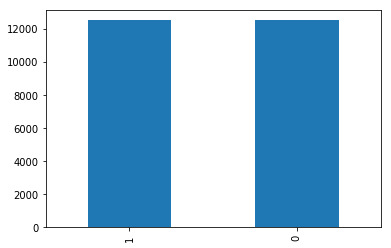

In [12]:
df['category'].value_counts().plot.bar()

## explore the images

In [13]:
import random
from keras.preprocessing.image import ImageDataGenerator, load_img
%matplotlib inline
import matplotlib.pyplot as plt


Using TensorFlow backend.


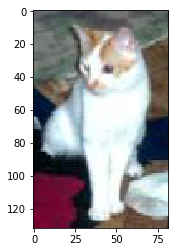

In [14]:

sample = random.choice(filenames)
image = load_img("../tmp/train/"+sample)
plt.imshow(image)

### if we run the above cell many times we will notice different varity of image in their pixels ,and there are all images in RGB colors .Before training a Neural network with them you'll need to tweak the images
### we will standarize these all images in 150*150*3 for RGB images 

# building the intial model for that problem 

In [0]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [16]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

W0618 09:32:09.998558 140306131478400 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [18]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics = ['acc'])

W0618 09:32:10.241979 140306131478400 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# the preprocessing step

In [0]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [20]:
validate_df.shape[0]

5000

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [22]:
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_dataframe(train_df,'/tmp/train',x_col='filename',
    y_col='category',batch_size=20, class_mode='binary', target_size=(150, 150))
  
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_dataframe(validate_df,'/tmp/train',x_col='filename',
    y_col='category',batch_size=20, class_mode='binary', target_size=(150, 150))
  

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


### train the model

In [23]:
history = model.fit_generator(train_generator, validation_data=validation_generator,
                              steps_per_epoch=100,epochs=15,validation_steps=50, verbose=2)

Epoch 1/15
100/100 - 12s - loss: 0.8424 - acc: 0.5300 - val_loss: 0.6669 - val_acc: 0.6350
Epoch 2/15
100/100 - 10s - loss: 0.6745 - acc: 0.6200 - val_loss: 0.6237 - val_acc: 0.6150
Epoch 3/15
100/100 - 9s - loss: 0.6146 - acc: 0.6790 - val_loss: 0.5712 - val_acc: 0.6990
Epoch 4/15
100/100 - 10s - loss: 0.5948 - acc: 0.6755 - val_loss: 0.5621 - val_acc: 0.7000
Epoch 5/15
100/100 - 9s - loss: 0.5786 - acc: 0.7050 - val_loss: 0.6338 - val_acc: 0.6590
Epoch 6/15
100/100 - 10s - loss: 0.5916 - acc: 0.7030 - val_loss: 0.5653 - val_acc: 0.7110
Epoch 7/15
100/100 - 10s - loss: 0.5466 - acc: 0.7225 - val_loss: 0.5369 - val_acc: 0.7280
Epoch 8/15
100/100 - 9s - loss: 0.5258 - acc: 0.7375 - val_loss: 0.4975 - val_acc: 0.7550
Epoch 9/15
100/100 - 9s - loss: 0.5340 - acc: 0.7400 - val_loss: 0.4968 - val_acc: 0.7440
Epoch 10/15
100/100 - 9s - loss: 0.5264 - acc: 0.7390 - val_loss: 0.5107 - val_acc: 0.7490
Epoch 11/15
100/100 - 10s - loss: 0.4580 - acc: 0.7930 - val_loss: 0.4866 - val_acc: 0.7610
Ep

In [0]:
local_zip = '/content/test1.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [25]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/tmp/test1/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving 109.jpg to 109.jpg
Saving 110.jpg to 110.jpg
Saving 111.jpg to 111.jpg
Saving 112.jpg to 112.jpg
[1.]
109.jpg is a dog
[1.]
110.jpg is a dog
[1.]
111.jpg is a dog
[0.]
112.jpg is a cat


Text(0.5, 1.0, 'Training and validation loss')

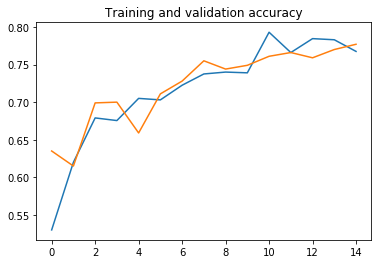

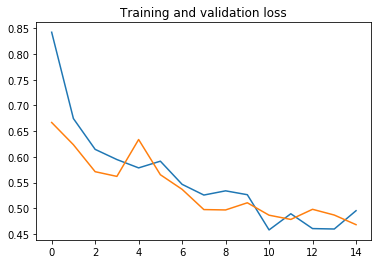

In [26]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

### as we shown above we need further work to move the accuracy up for the training and validation data. we will try many thing in data augmentation, to increase the training set , to make more data learning   

### we will try some kinds of augmentation to increase the images , train the model of different kind of images , rotation , shift range , shear range , zoom range , howrizontal flipping 

In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
# Flow training images in batches of 20 using train_datagen generator
#train_generator = train_datagen.flow_from_directory(
      #  train_dir,  # This is the source directory for training images
       # target_size=(150, 150),  # All images will be resized to 150x150
       # batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
       # class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
#validation_generator = test_datagen.flow_from_directory(
      #  validation_dir,
       ## target_size=(150, 150),
       # batch_size=20,
       # class_mode='binary')

train_generator = train_datagen.flow_from_dataframe(train_df,'/tmp/train',x_col='filename',
    y_col='category',batch_size=20, class_mode='binary', target_size=(150, 150))
  
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_dataframe(validate_df,'/tmp/train',x_col='filename',
    y_col='category',batch_size=20, class_mode='binary', target_size=(150, 150))



Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [29]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/50
100/100 - 21s - loss: 0.5983 - acc: 0.6795 - val_loss: 0.4843 - val_acc: 0.7540
Epoch 2/50
100/100 - 19s - loss: 0.5819 - acc: 0.7065 - val_loss: 0.4687 - val_acc: 0.7770
Epoch 3/50
100/100 - 19s - loss: 0.5677 - acc: 0.7050 - val_loss: 0.5456 - val_acc: 0.7410
Epoch 4/50
100/100 - 19s - loss: 0.5750 - acc: 0.7125 - val_loss: 0.4881 - val_acc: 0.7810
Epoch 5/50
100/100 - 19s - loss: 0.5838 - acc: 0.6865 - val_loss: 0.6253 - val_acc: 0.6780
Epoch 6/50
100/100 - 19s - loss: 0.5761 - acc: 0.7030 - val_loss: 0.5143 - val_acc: 0.7270
Epoch 7/50
100/100 - 19s - loss: 0.5769 - acc: 0.7055 - val_loss: 0.5302 - val_acc: 0.7470
Epoch 8/50
100/100 - 19s - loss: 0.5735 - acc: 0.7000 - val_loss: 0.5436 - val_acc: 0.7610
Epoch 9/50
100/100 - 19s - loss: 0.5564 - acc: 0.7190 - val_loss: 0.5317 - val_acc: 0.7750
Epoch 10/50
100/100 - 19s - loss: 0.5538 - acc: 0.7360 - val_loss: 0.5045 - val_acc: 0.7460
Epoch 11/50
100/100 - 19s - loss: 0.5600 - acc: 0.7190 - val_loss: 0.4560 - val_acc: 0.78

we will see that the accuracy still stable between 70 to 75 , we will use transfer learning. 

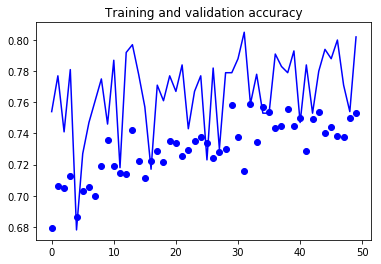

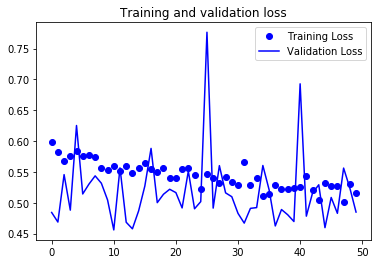

In [30]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

we will check the transfer learning module , checked by MobileNet V2 pre-trained model over 1.4 million images . we will lock all layers and adding the last dense and classification layers to it . 

In [32]:
base_model = tf.keras.applications.MobileNetV2(input_shape =(150,150,3) ,
                                               include_top =False ,weights ='imagenet')
base_model.trainable = False

base_model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 151, 151, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
from tensorflow import keras


In [0]:
model = tf.keras.Sequential([base_model , keras.layers.GlobalAveragePooling2D(),
                           keras.layers.Dense(1 ,activation='sigmoid')])

In [0]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [38]:
steps_per_epoch = train_generator.n
validation_steps = validation_generator.n 

history = model.fit_generator(train_generator, 
                              steps_per_epoch = steps_per_epoch,
                              epochs=10, 
                              workers=4,
                              validation_data=validation_generator, 
                              validation_steps=validation_steps)

Epoch 1/10
20000/20000 [==============================] - 3391s 170ms/step - loss: 0.2696 - acc: 0.8803 - val_loss: 0.2957 - val_acc: 0.9100
Epoch 2/10
20000/20000 [==============================] - 3382s 169ms/step - loss: 0.2420 - acc: 0.8950 - val_loss: 0.2573 - val_acc: 0.9216
Epoch 3/10
 2716/20000 [===>..........................] - ETA: 43:53 - loss: 0.2401 - acc: 0.8966

KeyboardInterrupt: ignored

I have to cancel the execution , because it takes too much time . but this method is very very useful in image classification the training accuracy will be reach 95 , and the validation set will reach 98 .